## Hey :)
### I'm doing Machine Learning (you will see soon how hard I work)

### Please follow the runing instructions:
### 1. run me first
### 2. 'Date_Picker'
### 3. My_Prediction

In [1]:
from bs4 import BeautifulSoup
import requests
import json
import pandas as pd
import matplotlib as np
from datetime import date
import re
import os
from matplotlib import pyplot as plt
from numpy import random
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def get_url_content(url):
    url = "https://www.transfermarkt.com" + url
    response = requests.get(url, headers={'User-Agent': 'Custom'})
    return BeautifulSoup(response.content, 'html.parser')

In [3]:
def get_name_and_id_from_url(url):
    team_partitioned_link = url.partition('/')
    team_partitioned_link = team_partitioned_link[2]
    team_partitioned_link = team_partitioned_link.partition('/')
    teamName_url = team_partitioned_link[0]
    team_partitioned_link = team_partitioned_link[2]
    team_partitioned_link = team_partitioned_link.partition('/')
    team_partitioned_link = team_partitioned_link[2]
    team_partitioned_link = team_partitioned_link.partition('/')
    team_partitioned_link = team_partitioned_link[2]
    team_partitioned_link = team_partitioned_link.partition('/')
    team_id = team_partitioned_link[0]
    return teamName_url, team_id

In [4]:
#competitions table 
%store -z 

Competitions = ["Bundesliga", "Seria A", "Ligue 1","Primier League", "La Liga"]
competitions_df = pd.DataFrame(Competitions, columns = ['Competition'])
competitions_df = competitions_df.style.set_properties(**{'text-align': 'center','background-color':'#f7e4f5'})
competitions_df = competitions_df.set_table_styles([dict(selector = 'th', 
                                                         props=[('text-align', 'center'),('background-color', '#f7e4f5')])])
display(competitions_df)
competition_to_learn_num = int(input("Choose the competition number you want to learn: "))

,Competition
0,Bundesliga
1,Seria A
2,Ligue 1
3,Primier League
4,La Liga


Choose the competition number you want to learn: 3


In [5]:
Seasons = ["15/16", "16/17","17/18", "18/19","19/20"]
seasons_df = pd.DataFrame(Seasons, columns = ['Seasons'])
seasons_df = seasons_df.style.set_properties(**{'text-align': 'center','background-color':'#dcf5f7'})
seasons_df = seasons_df.set_table_styles([dict(selector = 'th', 
                                               props=[('text-align', 'center'),('background-color', '#dcf5f7')])])

display(seasons_df)
season_learning_number = int(input("Choose the season number you want to learn: "))

,Seasons
0,15/16
1,16/17
2,17/18
3,18/19
4,19/20


Choose the season number you want to learn: 2


In [6]:
def competition_switcher(x):
    switcher = {
        0: ["bundesliga","L1"],
        1: ["serie-a","IT1"],
        2: ["ligue-1","FR1"], 
        3: ["premier-league","GB1"],
        4: ["laliga","ES1"]
    }
    return switcher.get(x, "you choose invalid Competiton number")

def season_switcher(x):
    switcher = {
        0: '2019',   
        1: '2018',   
        2: '2017',   
        3: '2016',   
        4: '2015'    
    }
    return switcher.get(x, "you choose invalid Season number")

In [7]:
#chosen competitions page 
    
competition_page = competition_switcher(competition_to_learn_num)
season_year = season_switcher(season_learning_number)

competition_url = "https://www.transfermarkt.com/" + competition_page[0] + "/spieltagtabelle/wettbewerb/" + competition_page[1] + "?saison_id=" + season_year + "&spieltag=1"

response = requests.get(competition_url, headers={'User-Agent': 'Custom'})
competition_url_content = BeautifulSoup(response.content, 'html.parser')

In [8]:
#teams url

competition_url = "https://www.transfermarkt.com/" + competition_page[0] + "/tabelle/wettbewerb/" + competition_page[1] + "/saison_id/" + season_year

response = requests.get(competition_url, headers={'User-Agent': 'Custom'})
competition_url_content = BeautifulSoup(response.content, 'html.parser')
teams_url_page = []

a = competition_url_content.find("div", class_= "responsive-table").find("table").find("tbody")
for tr in a.findAll("tr"):
    temp = tr.find("td", class_= "no-border-links hauptlink").find("a")
    team_name = temp.get_text(strip=True)
    team_full_link = temp.get('href')
    teamName_url, team_id = get_name_and_id_from_url(team_full_link);

    teams_url_page.append(tuple([team_name, teamName_url,team_id]))
    

In [9]:
#teams market values 

teams_values_url = "https://www.transfermarkt.com/" + competition_page[0] + "/marktwerteverein/wettbewerb/" + competition_page[1] + "/plus/?stichtag=" + season_year + "-09-01"

response = requests.get(teams_values_url, headers={'User-Agent': 'Custom'})
teams_values_url_content = BeautifulSoup(response.content, 'html.parser')


### Teams market values

In [10]:
teams_stats_sum = []
for each_tuple in teams_url_page:
    team_name = each_tuple[0]
    teams_values_url = "https://www.transfermarkt.com/" + each_tuple[1] + "/kader/verein/" + each_tuple[2] + "/plus/0/galerie/0?saison_id=" + season_year
    response = requests.get(teams_values_url, headers={'User-Agent': 'Custom'})
    teams_values_url_content = BeautifulSoup(response.content, 'html.parser')
    
    a = teams_values_url_content.find("div", class_= "large-4 columns").find("div", class_= "box").find("table").find("tfoot").find("tr")
    td_list = a.findAll("td")
    team_value = td_list[2].get_text(strip=True)
    team_value_final = float(re.search(r'\d+\.\d+', team_value).group())
    if 'm' in team_value.lower():
        team_value_final *= 1000000 
    elif 'b' in team_value.lower():
        team_value_final *= 1000000000
    team_value_final = int(team_value_final)
    teams_stats_sum.append([team_name, team_value_final, 0, 0, 0, 0, 0, each_tuple[2]])

while len(teams_stats_sum) < 20:
    teams_stats_sum.append([0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
def team_switcher(x):
    switcher = {
        teams_stats_sum[0][0]: 0,
        teams_stats_sum[1][0]: 1,
        teams_stats_sum[2][0]: 2,
        teams_stats_sum[3][0]: 3,
        teams_stats_sum[4][0]: 4,
        teams_stats_sum[5][0]: 5,
        teams_stats_sum[6][0]: 6,
        teams_stats_sum[7][0]: 7,
        teams_stats_sum[8][0]: 8,
        teams_stats_sum[9][0]: 9,
        teams_stats_sum[10][0]: 10,
        teams_stats_sum[11][0]: 11,
        teams_stats_sum[12][0]: 12,
        teams_stats_sum[13][0]: 13,
        teams_stats_sum[14][0]: 14,
        teams_stats_sum[15][0]: 15,
        teams_stats_sum[16][0]: 16,
        teams_stats_sum[17][0]: 17,
        teams_stats_sum[18][0]: 18,
        teams_stats_sum[19][0]: 19

    }
    return switcher.get(x, "invalid number")

### Season matches results

In [12]:
season_matches_results_url = "https://www.transfermarkt.com/" + competition_page[0] + "/gesamtspielplan/wettbewerb/" + competition_page[1] + "/saison_id/" + season_year
response = requests.get(season_matches_results_url, headers={'User-Agent': 'Custom'})
season_matches_results_url_content = BeautifulSoup(response.content, 'html.parser')    
print(season_matches_results_url)
base_url = "https://www.transfermarkt.com"
df_train_rows = []
df_target_rows = []

print("Please wait, Im working on it and Im working hard:( ")

https://www.transfermarkt.com/premier-league/gesamtspielplan/wettbewerb/GB1/saison_id/2017
Please wait, Im working on it and Im working hard:( 


In [13]:
for each_matchday in season_matches_results_url_content.findAll("div", class_= "large-6 columns"):
    current_matchday_table = each_matchday.find("table")
    if current_matchday_table != None:
        current_matchday_tbody = current_matchday_table.find("tbody")
        for row in current_matchday_tbody.findAll("tr", class_=None): 
            home_team_points = 0
            away_team_points = 0
            last_matches_between_teams_url = base_url
            
            for game_result in row.findAll("td", class_= "zentriert hauptlink"):
                result = game_result.find("a", class_= "ergebnis-link").get_text(strip=True)
                result = result.partition(':')
                home_team_goals = int(re.search(r'\d+', result[0]).group())
                away_team_goals = int(re.search(r'\d+', result[2]).group())
                if home_team_goals > away_team_goals:
                    home_team_points = 2
                    df_target_rows.append(2)
                elif home_team_goals < away_team_goals:
                    away_team_points = 2
                    df_target_rows.append(0)
                else:
                    home_team_points = 1
                    away_team_points = 1
                    df_target_rows.append(1)
                last_matches_between_teams_url += game_result.find("a", class_= "ergebnis-link").get('href')
            
            for home_team_stats in row.findAll("td", class_= "text-right no-border-rechts hauptlink"):
                home_team_position = home_team_stats.find("span", class_= "tabellenplatz").get_text(strip=True)
                home_team_position = int(re.search(r'\d+', home_team_position).group())
                home_team_name = home_team_stats.find("a").get_text(strip=True)
                switcher_home_num = team_switcher(home_team_name)
                try:      
                    home_team_current_points =  teams_stats_sum[switcher_home_num][3] / teams_stats_sum[switcher_home_num][5]
                except:
                    home_team_current_points = 0

                teams_stats_sum[switcher_home_num][2] = home_team_position
                teams_stats_sum[switcher_home_num][5] += 1
                teams_stats_sum[switcher_home_num][3] += home_team_points
                
            for away_team_stats in row.findAll("td", class_= "no-border-links hauptlink"): #away team
                away_team_position = away_team_stats.find("span", class_= "tabellenplatz").get_text(strip=True)
                away_team_position = int(re.search(r'\d+', away_team_position).group())
                away_team_name = away_team_stats.find("a").get_text(strip=True)

                switcher_away_num = team_switcher(away_team_name)
                try:      
                    away_team_current_points = teams_stats_sum[switcher_away_num][4] / teams_stats_sum[switcher_away_num][6]
                except:
                    away_team_current_points = 0   
                
                teams_stats_sum[switcher_away_num][2] = away_team_position
                teams_stats_sum[switcher_away_num][6] += 1
                teams_stats_sum[switcher_away_num][4] += away_team_points
                
            last_matches_between_teams_url = re.sub('/index/', '/vorbericht/', last_matches_between_teams_url)
            response = requests.get(last_matches_between_teams_url, headers={'User-Agent': 'Custom'})
            last_matches_between_teams_url_content = BeautifulSoup(response.content, 'html.parser')
            
            last_matches_between_teams = last_matches_between_teams_url_content.find("div", class_="table-header",
                          text=re.compile('Last')).find_parent("div", class_="box")
            
            current_match_home_team_points = 0
            current_match_away_team_points = 0
            match_results = last_matches_between_teams.find("tbody")
            for each_match_result in match_results.findAll("tr"):
                current_match_competition = each_match_result.find("td", class_= "zentriert").find('img').get('title') # want to get only league games
                current_match_competition = current_match_competition.partition('.')[0]
                if current_match_competition.lower() == competition_page[1].lower():
                    temp = each_match_result.find("td", class_="no-border-links")
                    current_teamName_url, current_home_team_id = get_name_and_id_from_url(team_full_link);
                    
                    home_team_id = teams_stats_sum[switcher_home_num][7]
                
                    if home_team_id == current_home_team_id:
                        current_match_res = each_match_result.find("a", title="Match report", class_="ergebnis-link").get_text(strip=True)
                        current_match_res = current_match_res.partition(':')
                        current_match_home_team_goals = int(re.search(r'\d+', current_match_res[0]).group())
                        current_match_away_team_goals = int(re.search(r'\d+', current_match_res[2]).group())
                        if current_match_home_team_goals > current_match_away_team_goals:
                            current_match_home_team_points += 2
                        elif current_match_home_team_goals < current_match_away_team_goals:
                            current_match_away_team_points += 2
                        else:
                            current_match_home_team_points += 1
                            current_match_away_team_points += 1

            
            last_matches_between_teams_results = current_match_home_team_points - current_match_away_team_points
            positions = teams_stats_sum[switcher_away_num][2] - teams_stats_sum[switcher_home_num][2]
            values = teams_stats_sum[switcher_home_num][1] / teams_stats_sum[switcher_away_num][1]

            last_each_team_results = home_team_current_points - away_team_current_points
            df_train_rows.append(tuple([values, positions, last_each_team_results, last_matches_between_teams_results]))

In [14]:
#train df 

df_train = pd.DataFrame(df_train_rows, columns = ['Values', 'Positions', "Last teams results",'Last results between teams'])
df_train.to_csv("df_train.csv")
df_train = df_train.style.set_properties(**{'text-align': 'left'})

df_train = df_train.set_table_styles([dict(selector = 'th', props=[('text-align', 'left')])])

In [15]:
#target df

df_target = pd.DataFrame(df_target_rows, columns = ['Match Result']) 
df_target.to_csv("df_target.csv")
df_target = df_target.style.set_properties(**{'text-align': 'left'})

df_target = df_target.set_table_styles([dict(selector = 'th', props=[('text-align', 'left')])])

### Split Data

In [16]:
X = df_train_rows
y = df_target_rows
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

### Logistic Regression

In [17]:
lr_model = LogisticRegression(solver='liblinear', random_state=42)
lr_model.fit(X_train, y_train)
lr_model_test_results = metrics.accuracy_score(y_true = y_test, y_pred = lr_model.predict(X_test))

### Naive Bayes

In [18]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
y_pred = nb_model.predict(X_test) 
y_pred_train = nb_model.predict(X_train)
nb_model_test_results = metrics.accuracy_score(y_true = y_test, y_pred = y_pred)

### KNN

In [19]:
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(X_train, y_train)
knn_model_test_results = metrics.accuracy_score(y_true = y_test, y_pred = knn_model.predict(X_test))

### Best Model

In [20]:
print('Logistic Regression test result= ', lr_model_test_results)
print('Naive Bayes test result= ', nb_model_test_results)
print('KNN test result=',knn_model_test_results )
if (lr_model_test_results > nb_model_test_results):
    best_model = lr_model
elif(knn_model_test_results > nb_model_test_results):
    best_model = knn_model
else: best_model = nb_model
print('Best test result = ', best_model)
 

Logistic Regression test result=  0.49122807017543857
Naive Bayes test result=  0.49122807017543857
KNN test result= 0.5087719298245614
Best test result =  KNeighborsClassifier(n_neighbors=9)


In [21]:
#switcher algorithm

def machineLearning_algo_switcher(x):
    switcher = {
        0: lr_model,       #Logistic Regression
        1: nb_model,       #Naive Bayes
        2: knn_model,      #KNN
        3: best_model
    }
    return switcher.get(x, "Invalid Machine Learning algorithm's number")


In [22]:
Machine_Learning_Algorithms = ["Logistic Regression", "Naive Bayes","KNN", "The Best"]

ML_Algorithms_df = pd.DataFrame(Machine_Learning_Algorithms, columns = ['Machine_Learning_Algorithms'])
ML_Algorithms_df = ML_Algorithms_df.style.set_properties(**{'text-align': 'left','background-color':'#dcf5f7'})
ML_Algorithms_df = ML_Algorithms_df.set_table_styles([dict(selector = 'th', props=[('text-align', 'left'),('background-color', '#d0f8ff')])])
display(ML_Algorithms_df)
chosen_number_algo = int(input("Choose Machine Learning Algorithm number: "))

chosen_model = machineLearning_algo_switcher(chosen_number_algo)
%store chosen_model
print(chosen_model)

,Machine_Learning_Algorithms
0,Logistic Regression
1,Naive Bayes
2,KNN
3,The Best


Choose Machine Learning Algorithm number: 0
Stored 'chosen_model' (LogisticRegression)
LogisticRegression(random_state=42, solver='liblinear')


### Visualizing Confusion Matrix using Heatmap

In [23]:
LogisticRegression_matrix = metrics.confusion_matrix(y_test, lr_model.predict(X_test))
NaiveBayes_matrix = metrics.confusion_matrix(y_test, y_pred)
KNN_matrix = metrics.confusion_matrix(y_test, knn_model.predict(X_test))

#### Logistic Regression's Confusion Matrix Heatmap

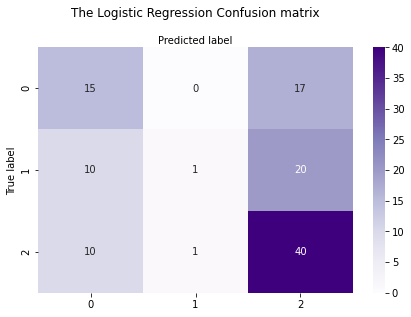

Logistic Regression - The accuracy on test data:  0.49122807017543857


In [24]:
name_of_classes = [1,2,3] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(name_of_classes))
plt.xticks(tick_marks, name_of_classes)
plt.yticks(tick_marks, name_of_classes)

sns.heatmap(pd.DataFrame(LogisticRegression_matrix), annot=True, cmap="Purples" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('The Logistic Regression Confusion matrix', y=1.1)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print('Logistic Regression - The accuracy on test data: ', lr_model_test_results)


#### Naive Bayes's Confusion Matrix Heatmap

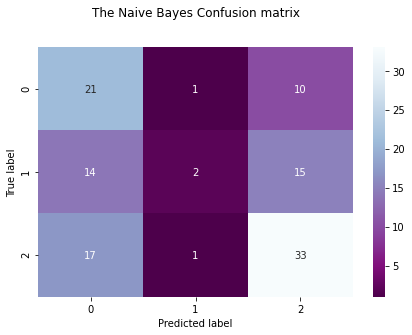

Naive Bayes - The accuracy on train data is: 0.518796992481203
Naive Bayes - The accuracy on test data is: 0.49122807017543857


In [25]:
sns.heatmap(pd.DataFrame(NaiveBayes_matrix), annot=True, cmap="BuPu_r" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('The Naive Bayes Confusion matrix', y=1.1)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print('Naive Bayes - The accuracy on train data is:', metrics.accuracy_score(y_true = y_train, y_pred = y_pred_train))
print('Naive Bayes - The accuracy on test data is:', nb_model_test_results)

#### KNN's Confusion Matrix Heatmap

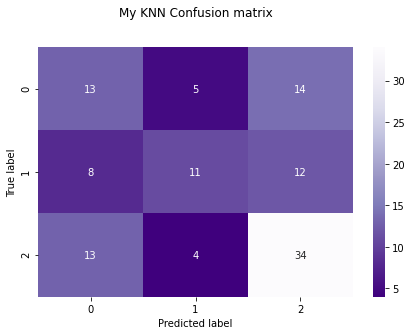

KNN - The accuracy on test data:  0.5087719298245614


In [26]:
sns.heatmap(pd.DataFrame(KNN_matrix), annot=True, cmap="Purples_r" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('My KNN Confusion matrix', y=1.1)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print('KNN - The accuracy on test data: ', knn_model_test_results)